<a href="https://colab.research.google.com/github/joankl/Solar-Neutrinos-Project/blob/main/Study_of_hit_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separation of Scint.(hit_type=2) from Cher.(hit_type=1)

In [1]:
#Acess to drive files
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

#import mine modules from google drive
import sys
sys.path.append('/content/gdrive/MyDrive/modules')
from analysis_simulation import Analysis_simulation, magnitude
from modulus_simplification import GetPMTCoord

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install uproot
import uproot
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sn
from tqdm import tqdm

import numpy as np
from numpy import array, where, shape, reshape

import pandas as pd

In [3]:
file = uproot.open('/content/gdrive/MyDrive/Colab Notebooks/py_out1.root')

In [4]:
#IDs = [1,2,50,31,23,11]
#IDs = np.arange(0,51)
df = Analysis_simulation(file, [11])
df.head()

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873


In [5]:
#extarct one eventID info
evt_id_11 = df.loc[df['eventID'] == 11]
evt_id_11

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873


In [6]:
hit_type_ev = np.array(df['hit type'])[0]
pmt_ID_ev = np.array(df['hitpmt ID'])[0]
vertex_coord = np.array(df['mc coordinates'])[0]

In [7]:
vertex_coord

array([ 3557.81079102, -2256.09936523,  3368.94946289])

### Separate PMT id relative to hit_type of event

In [8]:
import itertools

condition_1 = (hit_type_ev == 1)
condition_2 = (hit_type_ev == 2)

pmtID_hit_1 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 1
pmtID_hit_2 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 2

for (i,j) in zip(where(condition_1), where(condition_2)):
    pmtID_hit_1 = np.append(pmtID_hit_1, pmt_ID_ev[i])
    pmtID_hit_2 = np.append(pmtID_hit_2, pmt_ID_ev[j])

### Now see the coordinate of such PMTs once separated

In [9]:
hit_type_1_coord = GetPMTCoord(file,pmtID_hit_1)
hit_type_2_coord = GetPMTCoord(file,pmtID_hit_2)

In [10]:
hit_type_1_coord.head()

,x,y,z,zenit,azimut,rad
0,6576.25,1326.20,5080.24,0.922660,0.198996,8415.147590
1,6725.23,3698.58,3420.12,1.151600,0.502809,8402.703933
2,4069.56,3035.35,-6720.39,2.494617,0.640851,8422.488348
3,5447.62,4683.72,4320.90,1.029320,0.710141,8383.553752
4,3302.21,5467.24,-5455.65,2.277703,1.027441,8399.965537


In [11]:
hit_type_2_coord.head()

,x,y,z,zenit,azimut,rad
0,2380.63,-176.30,-8059.18,2.853623,-0.073921,8405.287809
1,5272.76,922.26,-6502.76,2.452889,0.173159,8422.496610
2,7589.93,640.41,-3558.01,2.007796,0.084177,8406.937465
3,7944.53,241.22,-2765.36,1.905620,0.030354,8415.518994
4,8081.78,1068.09,-2054.53,1.817681,0.131399,8406.966025


In [12]:
zenit_1 = array(hit_type_1_coord['zenit'])
azimut_1 = array(hit_type_1_coord['azimut'])

zenit_2 = array(hit_type_2_coord['zenit'])
azimut_2 = array(hit_type_2_coord['azimut'])

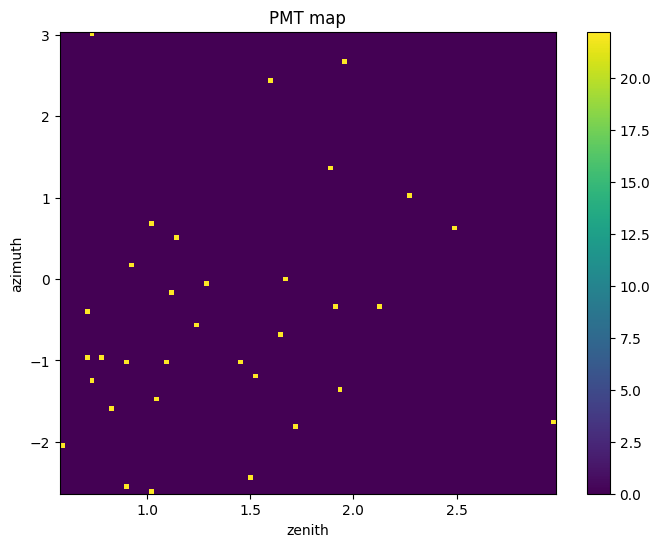

In [13]:
plt.figure(figsize=(8,6))
plt.hist2d(x = zenit_1, y = azimut_1, bins = [100,100], density = True)
plt.ylabel('azimuth')
plt.xlabel('zenith')
plt.title('PMT map')
plt.colorbar()
plt.show()

### 3D Plot hit_types for this event

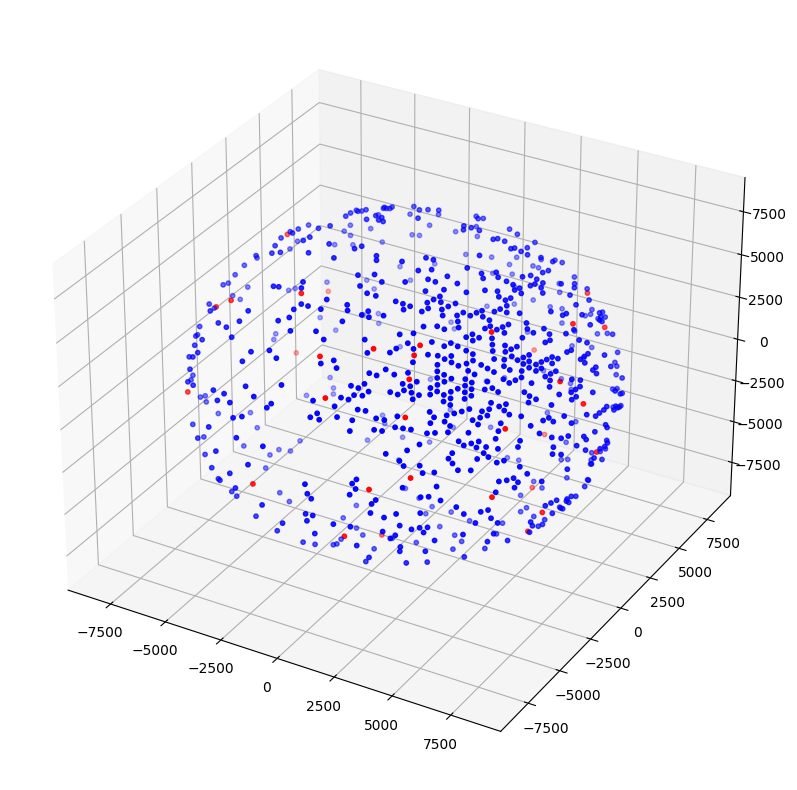

In [14]:
x_hit_1 = array(hit_type_1_coord['x'])
y_hit_1 = array(hit_type_1_coord['y'])
z_hit_1 = array(hit_type_1_coord['z'])

x_hit_2 = array(hit_type_2_coord['x'])
y_hit_2 = array(hit_type_2_coord['y'])
z_hit_2 = array(hit_type_2_coord['z'])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_hit_1, y_hit_1, z_hit_1, c = 'r', s = 10, label = 'CEV')
ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'b', s = 10, label = 'SCINT')

plt.show()